In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import requests

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import seaborn as sns

# Importing the dataset

In [12]:
def get_data(data):
    dataset = pd.read_csv(data)
    X = dataset.drop(columns=['Sales'], axis=1)
    y = pd.DataFrame(data=dataset['Sales'])
    
    return X, y

# Spliting into train and test

In [13]:
def split_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    return X_train, X_test, y_train, y_test

# Training the Multiple Linear Regression model on the Training set

In [14]:
def random_forest_regression(X_train, y_train):
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train.ravel())
    
    return regressor

# Evaluating the Model Performance

In [15]:
def evaluate(y_test, y_pred):
    y_test = np.array(y_test, dtype=float)
    
    return r2_score(y_test, y_pred)

# Exporting the results to csv

In [16]:
def organize_prediction(X_pred, y_pred):
    y_pred= pd.DataFrame(data=y_pred, columns=['Sales'])
    y_pred = pd.concat([X_pred, y_pred], axis = 1)

    return y_pred

In [17]:
def export_result(y_pred, file_name):
    result = pd.concat([X_pred, y_pred], axis=1)
    result.to_csv(file_name)
    
    return None

# Visualize results

In [18]:
def plot_graph(y_pred, y_test, y_result):
    new_dataset = y_pred[['Year','Sales', 'Day', 'Month']].groupby(['Year', 'Day', 'Month']).sum().reset_index()
    fig = sns.lineplot(data=new_dataset[(new_dataset['Year'] == 2015) & (new_dataset['Month'] == 8)], x="Day", y="Sales")
    fig.set(xlim=(1,6))
    fig.ticklabel_format(style='plain', axis='y')
    fig.set_title('Accuracy {:.10f}%'.format(evaluate(y_test, y_result)))
    
    return None

# ETL

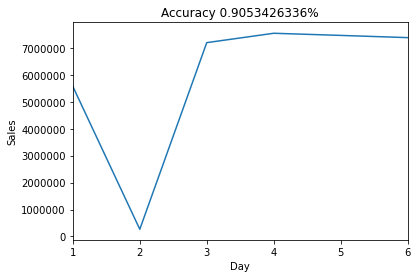

In [19]:
if __name__ == '__main__':
    # get data
    X, y = get_data('preprocessed_data/data.csv')
    X_pred = pd.read_csv('preprocessed_data/X_pred.csv')
    
    # split train and test
    X_train, X_test, y_train, y_test = split_train_test(X.values, y.values)
    
    # train
    regressor = random_forest_regression(X_train, y_train)
    
    # predict
    y_result = regressor.predict(X_test)
    y_pred = regressor.predict(X_pred)
    
    # visualize
    y_pred = organize_prediction(X_pred, y_pred)
    export_result(y_pred, 'result_data/random_forest_regression.csv')
    plot_graph(y_pred, y_test, y_result)

In [170]:
pickle.dump(regressor, open('deploy/random_forest_sales_prediction.pkl', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [144]:
display(X)

,Unnamed: 0,StoreId,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,...,Jun,Mar,May,Nov,Oct,Sept,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,0,1,0,1270,1,1970,0,23,1970,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,1270,1,1970,0,23,1970,1,...,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1270,1,1970,0,23,1970,1,...,0,0,0,0,0,0,0,0,1,0
3,3,1,0,1270,1,1970,0,23,1970,1,...,0,0,0,0,0,0,0,0,1,0
4,4,1,0,1270,1,1970,0,23,1970,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1115,2,5350,1,1970,1,22,1970,1,...,1,1,0,0,0,1,0,0,0,1
1017205,1017205,1115,2,5350,1,1970,1,22,1970,1,...,1,1,0,0,0,1,0,0,0,1
1017206,1017206,1115,2,5350,1,1970,1,22,1970,1,...,1,1,0,0,0,1,0,0,0,1
1017207,1017207,1115,2,5350,1,1970,1,22,1970,1,...,1,1,0,0,0,1,0,0,0,1


In [171]:
df_json = X.sample().to_json(orient='records')

In [172]:
url = 'https://rossman-drugstore-sales.herokuapp.com/predict'
data = df_json
headers = {'Content-type': 'application/json'}
r = requests.post(url=url, data=data, headers=headers)

In [173]:
r.status_code

200

In [174]:
print(r)

<Response [200]>


In [175]:
pd.DataFrame(r.json(), columns=r.json()[0].keys())

,Unnamed: 0,StoreId,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,...,Mar,May,Nov,Oct,Sept,StoreType_a,StoreType_b,StoreType_c,StoreType_d,prediction
0,94717,104,0,390,1,1970,0,23,1970,1,...,0,0,0,0,0,1,0,0,0,0.0
